# Cell Type Classifier
Classify cell type images from Bo Sun's Lab.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from IPython.display import Image

import numpy as np
import tensorflow as tf
import label_image

### Choose image to be classified.

Cell Type: hemisphere


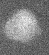

In [2]:
# cell types: 'filopodia', 'smallbleb', 'actinedge', 'hemisphere', 'lamellipodia'
cell_type = 'hemisphere'
cell_num = 32


file_name = 'original_cell_type_images/'+cell_type+'/'+cell_type+'_'+str(cell_num)+'.jpg'
print('Cell Type:', cell_type)
Image(file_name)

In [3]:
# Available Trained models
inception_v1 = "output_files/output_graph_inception_v1.pb"
inception_v2 = "output_files/output_graph_inception_v2.pb"
inception_v3 = "output_files/output_graph_inception_v3.pb"
mobilenet_v1 = 'output_graph_mobilenet_v1.pb'
mobilenet_v2 = 'output_graph_mobilenet_v2.pb'
inception_resnet_v2 = 'output_graph_inception_resnet_v2.pb'

#### Choose Model (model_file)...

In [4]:
model_file = inception_v3


# other paramaters with default values
label_file = "output_files/output_labels.txt"
input_height = 299
input_width = 299
input_mean = 0
input_std = 255
input_layer = 'Placeholder'
output_layer = 'final_result'

#### Run Prediction...

In [5]:
graph = label_image.load_graph(model_file)
t = label_image.read_tensor_from_image_file(
    file_name,
    input_height=input_height,
    input_width=input_width,
    input_mean=input_mean,
    input_std=input_std)

input_name = "import/" + input_layer
output_name = "import/" + output_layer
input_operation = graph.get_operation_by_name(input_name)
output_operation = graph.get_operation_by_name(output_name)

with tf.Session(graph=graph) as sess:
    results = sess.run(output_operation.outputs[0], {
    input_operation.outputs[0]: t
    })
    results = np.squeeze(results)

top_k = results.argsort()[-5:][::-1]
labels = label_image.load_labels(label_file)
predict = []
for i in top_k:
    predict.append([labels[i], results[i]])

#### Print Results...

Cell Type: lamellipodia
Best Prediction: lamellipodia 

['lamellipodia', 0.98328984]
['filopodia', 0.009185236]
['smallbleb', 0.0038733906]
['actinedge', 0.0019247666]
['hemisphere', 0.0017266459]


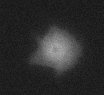

In [6]:
Image(file_name)

print('Cell Type:', cell_type)
print('Best Prediction:',predict[0][0],'\n')
for i in predict:
    print(i)
    
Image(file_name)